accuracy: 0.90


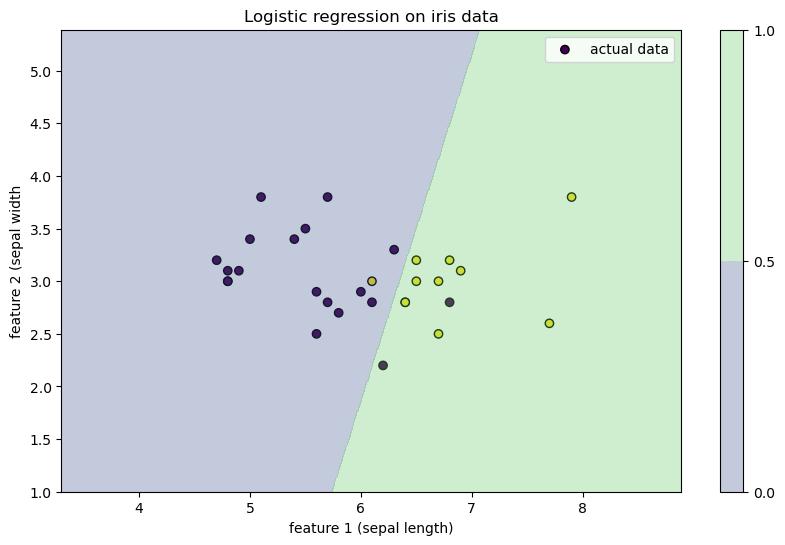

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Memuat data iris
iris = datasets.load_iris()
x = iris.data[:, :2]  # Hanya dua fitur pertama untuk visualisasi
y = (iris.target == 2).astype(int) # mengubah target menjadi biner

# Memisahkan data menjadi data training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Membangun model regresi linear
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

# Membuat prediksi
y_pred = logistic_reg.predict(x_test)

# Evaluasi model menggunakan mean squared error (MSE)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.2f}')

# Visualisasi hasil klasifikasi
plt.figure(figsize=(10, 6))

#plot data as point
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='viridis', edgecolor='k', label='actual data')

#plot decision boundary
x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
z = logistic_reg.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap='viridis', alpha=0.3, levels=np.linspace(0, 1, 3))
plt.colorbar()


plt.title('Logistic regression on iris data')
plt.xlabel('feature 1 (sepal length)')
plt.ylabel('feature 2 (sepal width')
plt.legend()
plt.show()
